In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as o
from sklearn import preprocessing
%matplotlib inline

In [2]:
# Importando os imóveis em bairros estritamente da Zona Central
# Os dados abaixo são os adquiridos sem o Q1 da tabela original, considerando apenas bairros com total de imóveis 
# acima do Q1 não normalizado nem padronizado.

dfzc = pd.read_excel(r'tabela_zona_central.xlsx')
display(dfzc)

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,10,2470853274,Zap Imóveis,Ponte Pequena,Centro,São Paulo,Aluguel,9,700,3300,30,1,1,1,1,110.00,8.101678,-0.067730,4.700480,1.888435
1,13,2471352586,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,0,1144,9000,159,3,3,2,5,56.60,9.104980,1.294745,4.036009,0.624739
2,14,2471737382,Zap Imóveis,Cambuci,Centro,São Paulo,Aluguel,0,0,4400,103,2,2,1,3,42.72,8.389360,0.322940,3.754667,0.089682
3,19,2472362687,Zap Imóveis,Campos Elíseos,Centro,São Paulo,Aluguel,35000,0,160000,11200,1,0,99,0,14.29,11.982929,5.202973,2.659560,-1.992999
4,59,2476465605,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,67,150,3142,20,1,0,0,1,157.10,8.052615,-0.134357,5.056883,2.566242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29834,227340,2454536488,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,118,612,2300,58,2,1,1,2,39.66,7.740664,-0.557982,3.680343,-0.051668
29835,227345,2467635849,Zap Imóveis,Higienópolis,Centro,São Paulo,Aluguel,820,3000,5100,260,3,1,2,2,19.62,8.536996,0.523428,2.976549,-1.390147
29836,227356,2441051781,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,0,508,1700,70,1,0,0,1,24.29,7.438384,-0.968477,3.190065,-0.984082
29837,227357,2435705692,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,54,587,1500,40,1,0,0,1,37.50,7.313220,-1.138447,3.624341,-0.158173


In [3]:
dfzc = dfzc.drop(columns = ['Unnamed: 0'])
display(dfzc)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2470853274,Zap Imóveis,Ponte Pequena,Centro,São Paulo,Aluguel,9,700,3300,30,1,1,1,1,110.00,8.101678,-0.067730,4.700480,1.888435
1,2471352586,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,0,1144,9000,159,3,3,2,5,56.60,9.104980,1.294745,4.036009,0.624739
2,2471737382,Zap Imóveis,Cambuci,Centro,São Paulo,Aluguel,0,0,4400,103,2,2,1,3,42.72,8.389360,0.322940,3.754667,0.089682
3,2472362687,Zap Imóveis,Campos Elíseos,Centro,São Paulo,Aluguel,35000,0,160000,11200,1,0,99,0,14.29,11.982929,5.202973,2.659560,-1.992999
4,2476465605,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,67,150,3142,20,1,0,0,1,157.10,8.052615,-0.134357,5.056883,2.566242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29834,2454536488,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,118,612,2300,58,2,1,1,2,39.66,7.740664,-0.557982,3.680343,-0.051668
29835,2467635849,Zap Imóveis,Higienópolis,Centro,São Paulo,Aluguel,820,3000,5100,260,3,1,2,2,19.62,8.536996,0.523428,2.976549,-1.390147
29836,2441051781,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,0,508,1700,70,1,0,0,1,24.29,7.438384,-0.968477,3.190065,-0.984082
29837,2435705692,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,54,587,1500,40,1,0,0,1,37.50,7.313220,-1.138447,3.624341,-0.158173


In [4]:
datazc = dfzc.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['max', 'min', 'mean', 'std', 'size'])
display(datazc)

max    min        mean         std  \
Zona   Bairro                                                                   
Centro Aclimação                        158.33   0.77   36.889980   16.343703   
       Barra Funda                      114.29  12.50   49.807045   20.462667   
       Bela Vista                      9629.63   0.85   52.203376  120.855334   
       Bom Retiro                       146.67   6.67   32.964641   16.667510   
       Brás                              29.55  23.81   26.241429    2.010352   
       Cambuci                          215.15   8.33   36.120222   14.930784   
       Campos Elíseos                   134.62  12.80   39.899706   21.200289   
       Canindé                           61.11   2.21   41.283846   17.762234   
       Centro Histórico de São Paulo   8366.67  11.11  126.119726  733.409041   
       Cerq. Cesar                       78.50  61.67   67.151429    7.811008   
       Cerqueira César                  909.09  14.06   58.438573   39.896624   
       Consolação                     18242.65   5.00   64.425789  361.286631   
       Higienópolis                   13103.45   2.87   47.944619  270.243429   
       Ipiranga                          23.53  23.53   23.530000         NaN   
       Jardim Paulista                  132.35  13.40   56.155062   25.738037   
       Jardim da Glória                  46.30  24.66   31.625000    7.982598   
       Liberdade                      10691.57   8.21   56.570242  300.654719   
       Mooca                             88.00  16.67   37.001905   15.580195   
       Pacaembu                         100.00  16.00   34.667361   11.970605   
       Paraíso                          100.00  20.69   51.200000   21.320649   
       Perdizes                          38.31  15.96   25.942500    9.496920   
       Ponte Pequena                    146.93  59.52   95.440000   26.955858   
       República                        116.67  12.78   45.210641   21.225669   
       Santa Cecilia                    140.00  13.42   38.863857   13.945079   
       Santa Cecília                   6842.11   4.50   43.819828  146.014192   
       Santana                           29.17  21.25   24.803125    1.704428   
       Sumaré                            40.74  40.74   40.740000         NaN   
       Sé                               131.82  11.11   66.511833   30.422993   
       Vila Mariana                      63.01  30.00   44.525556    9.140934   
       Vila Monumento                   125.00  16.67   51.270000   35.809917   
       Várzea da Barra Funda             54.63  33.79   44.210000   14.736105   

                                      size  
Zona   Bairro                               
Centro Aclimação                      2031  
       Barra Funda                     220  
       Bela Vista                     7089  
       Bom Retiro                     1183  
       Brás                              7  
       Cambuci                        1079  
       Campos Elíseos                  476  
       Canindé                          39  
       Centro Histórico de São Paulo   511  
       Cerq. Cesar                       7  
       Cerqueira César                 995  
       Consolação                     4951  
       Higienópolis                   4252  
       Ipiranga                          1  
       Jardim Paulista                 322  
       Jardim da Glória                  6  
       Liberdade                      1738  
       Mooca                            21  
       Pacaembu                         72  
       Paraíso                          67  
       Perdizes                          4  
       Ponte Pequena                    12  
       República                       437  
       Santa Cecilia                   280  
       Santa Cecília                  3718  
       Santana                          16  
       Sumaré                            1  
       Sé                              251  
       Vila Mariana

In [5]:
datazc.isna().any().sum()

1

In [6]:
dfzc.dropna(inplace=True)
dfzc.isna().any().sum()

0

In [7]:
# Coletando a mediana e o Q3 da tabela zona sul

mediana = np.percentile(dfzc.Aluguel_m2, 50)
q3 = np.percentile(dfzc.Aluguel_m2, 75)
print(mediana)
print(q3)

41.67
59.29


In [8]:
# Separando os imóveis cujos aluguéis se encontram entre a mediana e o Q3

df___ = dfzc[(dfzc.Aluguel_m2 >= mediana) & (dfzc.Aluguel_m2 <= q3)]
print(df___)

        Id_Oferta       Portal         Bairro    Zona     Cidade   Status  \
1      2471352586  Zap Imóveis     Consolação  Centro  São Paulo  Aluguel   
2      2471737382  Zap Imóveis        Cambuci  Centro  São Paulo  Aluguel   
7      2476833288  Zap Imóveis     Consolação  Centro  São Paulo  Aluguel   
12     2479893385  Zap Imóveis    Barra Funda  Centro  São Paulo  Aluguel   
14     2471783381  Zap Imóveis   Higienópolis  Centro  São Paulo  Aluguel   
...           ...          ...            ...     ...        ...      ...   
29807  2500426908  Zap Imóveis     Bela Vista  Centro  São Paulo  Aluguel   
29810  2500427776  Zap Imóveis     Consolação  Centro  São Paulo  Aluguel   
29813  2500465691  Zap Imóveis     Bela Vista  Centro  São Paulo  Aluguel   
29815  2460781815  Zap Imóveis  Santa Cecília  Centro  São Paulo  Aluguel   
29830  2460785281  Zap Imóveis   Higienópolis  Centro  São Paulo  Aluguel   

       Valor_Iptu  Valor_Condominio  Valor_Aluguel  Area_Privativa  \
1    

In [9]:
# Transformando num dataframe legível

df_a = pd.DataFrame(data=df___)
display(df_a)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
1,2471352586,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,0,1144,9000,159,3,3,2,5,56.60,9.104980,1.294745,4.036009,0.624739
2,2471737382,Zap Imóveis,Cambuci,Centro,São Paulo,Aluguel,0,0,4400,103,2,2,1,3,42.72,8.389360,0.322940,3.754667,0.089682
7,2476833288,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,0,471,1650,35,1,0,0,1,47.14,7.408531,-1.009017,3.853122,0.276924
12,2479893385,Zap Imóveis,Barra Funda,Centro,São Paulo,Aluguel,96,655,2820,60,2,1,1,2,47.00,7.944492,-0.281186,3.850148,0.271267
14,2471783381,Zap Imóveis,Higienópolis,Centro,São Paulo,Aluguel,1000,2000,10000,220,4,2,4,5,45.45,9.210340,1.437824,3.816613,0.207490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29807,2500426908,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,9,642,2300,39,1,1,1,1,58.97,7.740664,-0.557982,4.077029,0.702751
29810,2500427776,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,15,517,1760,40,1,1,1,1,44.00,7.473069,-0.921374,3.784190,0.145828
29813,2500465691,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,106,500,2300,51,2,0,1,1,45.10,7.740664,-0.557982,3.808882,0.192788
29815,2460781815,Zap Imóveis,Santa Cecília,Centro,São Paulo,Aluguel,0,850,4900,85,2,0,0,2,57.65,8.496990,0.469101,4.054390,0.659697


In [10]:
df_a.describe()

,Id_Oferta,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
count,7.639000e+03,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000
mean,2.445300e+09,413.204215,1156.110093,4056.031680,82.242047,1.721691,0.567614,1.096610,1.610944,49.550190,8.039673,-0.151932,3.897649,0.361605
std,2.713633e+08,2522.892827,4128.445946,3805.732818,76.089356,0.846439,0.813350,0.992292,1.081137,5.127252,0.665994,0.904413,0.103278,0.196415
min,4.581402e+07,0.000000,0.000000,850.000000,16.000000,1.000000,0.000000,0.000000,0.000000,41.670000,6.745236,-1.909764,3.729781,0.042354
25%,2.477233e+09,10.000000,450.000000,2000.000000,40.000000,1.000000,0.000000,1.000000,1.000000,45.000000,7.600902,-0.747778,3.806662,0.188567
50%,2.484355e+09,110.000000,650.000000,2500.000000,50.000000,1.000000,0.000000,1.000000,1.000000,49.060000,7.824046,-0.444751,3.893044,0.352848
75%,2.491363e+09,280.000000,1129.500000,4300.000000,90.000000,2.000000,1.000000,1.000000,2.000000,53.890000,8.366370,0.291720,3.986945,0.531429
max,2.500466e+09,91833.000000,162871.000000,50000.000000,880.000000,4.000000,4.000000,20.000000,22.000000,59.290000,10.819778,3.623425,4.082441,0.713043


In [11]:
# Agrupando as métricas básicas dos Bairros da zona central

datatable1 = df_a.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatable1)

min    max       mean       std  size
Zona   Bairro                                                                
Centro Aclimação                      41.67  58.97  48.751102  5.046207   372
       Barra Funda                    41.84  59.21  50.527805  5.114117    82
       Bela Vista                     41.67  59.29  50.293723  5.042020  1840
       Bom Retiro                     41.67  58.67  47.227576  4.623889   231
       Cambuci                        41.67  59.26  47.681464  4.632826   239
       Campos Elíseos                 41.67  59.00  48.655313  5.114424    96
       Canindé                        44.29  56.56  51.603333  5.544051     6
       Centro Histórico de São Paulo  41.67  59.09  49.526899  4.724732   129
       Cerqueira César                41.67  59.26  49.568270  4.695090   370
       Consolação                     41.67  59.29  49.926419  5.212510  1483
       Higienópolis                   41.67  59.29  49.040698  5.188108  1075
       Jardim Paulista                41.67  59.26  49.686854  4.423705    89
       Jardim da Glória               46.30  46.30  46.300000       NaN     1
       Liberdade                      41.67  59.23  50.854498  5.576936   458
       Mooca                          42.86  56.25  46.283333  5.245721     6
       Pacaembu                       41.98  58.70  47.368889  5.067491     9
       Paraíso                        47.22  57.14  54.304286  4.100430     7
       República                      41.67  58.70  50.127439  5.068265    82
       Santa Cecilia                  41.67  57.69  48.118382  4.664357    68
       Santa Cecília                  41.67  59.25  48.906701  4.906835   958
       Sé                             41.67  58.82  49.030000  5.999823    25
       Vila Mariana                   45.21  51.91  46.449000  2.486141    10
       Vila Monumento                 46.00  50.00  48.000000  2.828427     2
       Várzea da Barra Funda          54.63  54.63  54.630000       NaN     1

In [12]:
# Tratando os NaN

datatable1.replace(np.nan, 0, inplace=True)
display(datatable1)

min    max       mean       std  size
Zona   Bairro                                                                
Centro Aclimação                      41.67  58.97  48.751102  5.046207   372
       Barra Funda                    41.84  59.21  50.527805  5.114117    82
       Bela Vista                     41.67  59.29  50.293723  5.042020  1840
       Bom Retiro                     41.67  58.67  47.227576  4.623889   231
       Cambuci                        41.67  59.26  47.681464  4.632826   239
       Campos Elíseos                 41.67  59.00  48.655313  5.114424    96
       Canindé                        44.29  56.56  51.603333  5.544051     6
       Centro Histórico de São Paulo  41.67  59.09  49.526899  4.724732   129
       Cerqueira César                41.67  59.26  49.568270  4.695090   370
       Consolação                     41.67  59.29  49.926419  5.212510  1483
       Higienópolis                   41.67  59.29  49.040698  5.188108  1075
       Jardim Paulista                41.67  59.26  49.686854  4.423705    89
       Jardim da Glória               46.30  46.30  46.300000  0.000000     1
       Liberdade                      41.67  59.23  50.854498  5.576936   458
       Mooca                          42.86  56.25  46.283333  5.245721     6
       Pacaembu                       41.98  58.70  47.368889  5.067491     9
       Paraíso                        47.22  57.14  54.304286  4.100430     7
       República                      41.67  58.70  50.127439  5.068265    82
       Santa Cecilia                  41.67  57.69  48.118382  4.664357    68
       Santa Cecília                  41.67  59.25  48.906701  4.906835   958
       Sé                             41.67  58.82  49.030000  5.999823    25
       Vila Mariana                   45.21  51.91  46.449000  2.486141    10
       Vila Monumento                 46.00  50.00  48.000000  2.828427     2
       Várzea da Barra Funda          54.63  54.63  54.630000  0.000000     1

In [13]:
# Agrupando as métricas de acordo com os bairros e número de quartos (considerados de 4 para baixo)


datatable2 = df_a.groupby(['Zona', 'Bairro', 'Dormitorios']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatable2)

min    max       mean       std  \
Zona   Bairro                Dormitorios                                      
Centro Aclimação             1            41.67  58.97  49.537940  5.101751   
                             2            41.67  58.73  47.717386  4.270795   
                             3            41.67  58.82  48.289028  5.394968   
                             4            41.67  57.14  46.263077  5.222251   
       Barra Funda           1            41.84  58.75  49.887826  4.721729   
...                                         ...    ...        ...       ...   
       Vila Mariana          3            45.21  51.91  46.255714  2.503989   
                             4            45.21  50.28  46.900000  2.927166   
       Vila Monumento        1            50.00  50.00  50.000000       NaN   
                             2            46.00  46.00  46.000000       NaN   
       Várzea da Barra Funda 3            54.63  54.63  54.630000       NaN   

                                          size  
Zona   Bairro                Dormitorios        
Centro Aclimação             1             199  
                             2              88  
                             3              72  
                             4              13  
       Barra Funda           1              23  
...                                        ...  
       Vila Mariana          3               7  
                             4               3  
       Vila Monumento        1               1  
                             2               1  
       Várzea da Barra Funda 3               1  

[70 rows x 5 columns]

In [14]:
# Tratando os NaN

datatable2.replace(np.nan, 0, inplace=True)
display(datatable2)

min    max       mean       std  \
Zona   Bairro                Dormitorios                                      
Centro Aclimação             1            41.67  58.97  49.537940  5.101751   
                             2            41.67  58.73  47.717386  4.270795   
                             3            41.67  58.82  48.289028  5.394968   
                             4            41.67  57.14  46.263077  5.222251   
       Barra Funda           1            41.84  58.75  49.887826  4.721729   
...                                         ...    ...        ...       ...   
       Vila Mariana          3            45.21  51.91  46.255714  2.503989   
                             4            45.21  50.28  46.900000  2.927166   
       Vila Monumento        1            50.00  50.00  50.000000  0.000000   
                             2            46.00  46.00  46.000000  0.000000   
       Várzea da Barra Funda 3            54.63  54.63  54.630000  0.000000   

                                          size  
Zona   Bairro                Dormitorios        
Centro Aclimação             1             199  
                             2              88  
                             3              72  
                             4              13  
       Barra Funda           1              23  
...                                        ...  
       Vila Mariana          3               7  
                             4               3  
       Vila Monumento        1               1  
                             2               1  
       Várzea da Barra Funda 3               1  

[70 rows x 5 columns]

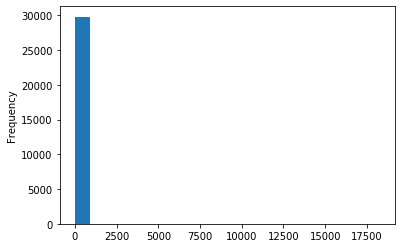

In [15]:
# Visualizando um Histograma simples

dfzc['Aluguel_m2'].plot.hist(bins=20)

### Padronizando os valores para Log

In [16]:
import warnings
warnings.filterwarnings("ignore")

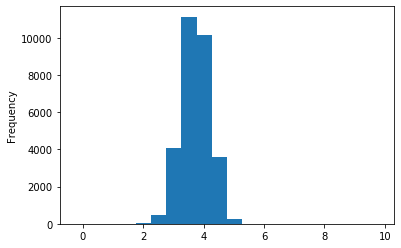

In [17]:
dfzc['log_Aluguel_m2'] = np.log(dfzc['Aluguel_m2'])
dfzc['log_Aluguel_m2'].plot.hist(bins=20)

In [18]:
# definindo os dados
x_zc = dfzc['log_Aluguel_m2']
# calculando a média 
mu_zc = np.mean(x_zc)
# calculando o desvio=padrão (utilizando o padrão para o Python)
std_zc = np.std(x_zc)
print('Média Zona Central: {}'.format(mu_zc))
print('Desvio Padrão Zona Central: {}'.format(std_zc))

Média Zona Central: 3.7395229176397713
Desvio Padrão Zona Central: 0.48456498759459243


In [19]:
# Coletando a mediana e o Q3 da tabela zona central

medianalog = np.percentile(dfzc.log_Aluguel_m2, 50)
q3log = np.percentile(dfzc.log_Aluguel_m2, 75)
print(medianalog)
print(q3log)

3.7297814454343623
4.0824406577192764


In [20]:
df_log = dfzc[(dfzc.log_Aluguel_m2 >= medianalog) & (dfzc.log_Aluguel_m2 <= q3log)]
print(df_log)

        Id_Oferta       Portal         Bairro    Zona     Cidade   Status  \
1      2471352586  Zap Imóveis     Consolação  Centro  São Paulo  Aluguel   
2      2471737382  Zap Imóveis        Cambuci  Centro  São Paulo  Aluguel   
7      2476833288  Zap Imóveis     Consolação  Centro  São Paulo  Aluguel   
12     2479893385  Zap Imóveis    Barra Funda  Centro  São Paulo  Aluguel   
14     2471783381  Zap Imóveis   Higienópolis  Centro  São Paulo  Aluguel   
...           ...          ...            ...     ...        ...      ...   
29807  2500426908  Zap Imóveis     Bela Vista  Centro  São Paulo  Aluguel   
29810  2500427776  Zap Imóveis     Consolação  Centro  São Paulo  Aluguel   
29813  2500465691  Zap Imóveis     Bela Vista  Centro  São Paulo  Aluguel   
29815  2460781815  Zap Imóveis  Santa Cecília  Centro  São Paulo  Aluguel   
29830  2460785281  Zap Imóveis   Higienópolis  Centro  São Paulo  Aluguel   

       Valor_Iptu  Valor_Condominio  Valor_Aluguel  Area_Privativa  \
1    

In [21]:
df_alog = pd.DataFrame(data=df_log)
display(df_alog)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
1,2471352586,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,0,1144,9000,159,3,3,2,5,56.60,9.104980,1.294745,4.036009,0.624739
2,2471737382,Zap Imóveis,Cambuci,Centro,São Paulo,Aluguel,0,0,4400,103,2,2,1,3,42.72,8.389360,0.322940,3.754667,0.089682
7,2476833288,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,0,471,1650,35,1,0,0,1,47.14,7.408531,-1.009017,3.853122,0.276924
12,2479893385,Zap Imóveis,Barra Funda,Centro,São Paulo,Aluguel,96,655,2820,60,2,1,1,2,47.00,7.944492,-0.281186,3.850148,0.271267
14,2471783381,Zap Imóveis,Higienópolis,Centro,São Paulo,Aluguel,1000,2000,10000,220,4,2,4,5,45.45,9.210340,1.437824,3.816613,0.207490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29807,2500426908,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,9,642,2300,39,1,1,1,1,58.97,7.740664,-0.557982,4.077029,0.702751
29810,2500427776,Zap Imóveis,Consolação,Centro,São Paulo,Aluguel,15,517,1760,40,1,1,1,1,44.00,7.473069,-0.921374,3.784190,0.145828
29813,2500465691,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,106,500,2300,51,2,0,1,1,45.10,7.740664,-0.557982,3.808882,0.192788
29815,2460781815,Zap Imóveis,Santa Cecília,Centro,São Paulo,Aluguel,0,850,4900,85,2,0,0,2,57.65,8.496990,0.469101,4.054390,0.659697


In [22]:
# Agrupando as métricas básicas da tabela padronizada dos Bairros da zona central para aluguel/m2

datatablelog1 = df_alog.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatablelog1)

min    max       mean       std  size
Zona   Bairro                                                                
Centro Aclimação                      41.67  58.97  48.751102  5.046207   372
       Barra Funda                    41.84  59.21  50.527805  5.114117    82
       Bela Vista                     41.67  59.29  50.293723  5.042020  1840
       Bom Retiro                     41.67  58.67  47.227576  4.623889   231
       Cambuci                        41.67  59.26  47.681464  4.632826   239
       Campos Elíseos                 41.67  59.00  48.655313  5.114424    96
       Canindé                        44.29  56.56  51.603333  5.544051     6
       Centro Histórico de São Paulo  41.67  59.09  49.526899  4.724732   129
       Cerqueira César                41.67  59.26  49.568270  4.695090   370
       Consolação                     41.67  59.29  49.926419  5.212510  1483
       Higienópolis                   41.67  59.29  49.040698  5.188108  1075
       Jardim Paulista                41.67  59.26  49.686854  4.423705    89
       Jardim da Glória               46.30  46.30  46.300000       NaN     1
       Liberdade                      41.67  59.23  50.854498  5.576936   458
       Mooca                          42.86  56.25  46.283333  5.245721     6
       Pacaembu                       41.98  58.70  47.368889  5.067491     9
       Paraíso                        47.22  57.14  54.304286  4.100430     7
       República                      41.67  58.70  50.127439  5.068265    82
       Santa Cecilia                  41.67  57.69  48.118382  4.664357    68
       Santa Cecília                  41.67  59.25  48.906701  4.906835   958
       Sé                             41.67  58.82  49.030000  5.999823    25
       Vila Mariana                   45.21  51.91  46.449000  2.486141    10
       Vila Monumento                 46.00  50.00  48.000000  2.828427     2
       Várzea da Barra Funda          54.63  54.63  54.630000       NaN     1

In [23]:
datatablelog1.replace(np.nan, 0, inplace=True)
display(datatablelog1)

min    max       mean       std  size
Zona   Bairro                                                                
Centro Aclimação                      41.67  58.97  48.751102  5.046207   372
       Barra Funda                    41.84  59.21  50.527805  5.114117    82
       Bela Vista                     41.67  59.29  50.293723  5.042020  1840
       Bom Retiro                     41.67  58.67  47.227576  4.623889   231
       Cambuci                        41.67  59.26  47.681464  4.632826   239
       Campos Elíseos                 41.67  59.00  48.655313  5.114424    96
       Canindé                        44.29  56.56  51.603333  5.544051     6
       Centro Histórico de São Paulo  41.67  59.09  49.526899  4.724732   129
       Cerqueira César                41.67  59.26  49.568270  4.695090   370
       Consolação                     41.67  59.29  49.926419  5.212510  1483
       Higienópolis                   41.67  59.29  49.040698  5.188108  1075
       Jardim Paulista                41.67  59.26  49.686854  4.423705    89
       Jardim da Glória               46.30  46.30  46.300000  0.000000     1
       Liberdade                      41.67  59.23  50.854498  5.576936   458
       Mooca                          42.86  56.25  46.283333  5.245721     6
       Pacaembu                       41.98  58.70  47.368889  5.067491     9
       Paraíso                        47.22  57.14  54.304286  4.100430     7
       República                      41.67  58.70  50.127439  5.068265    82
       Santa Cecilia                  41.67  57.69  48.118382  4.664357    68
       Santa Cecília                  41.67  59.25  48.906701  4.906835   958
       Sé                             41.67  58.82  49.030000  5.999823    25
       Vila Mariana                   45.21  51.91  46.449000  2.486141    10
       Vila Monumento                 46.00  50.00  48.000000  2.828427     2
       Várzea da Barra Funda          54.63  54.63  54.630000  0.000000     1

In [24]:
# Agrupando as métricas de acordo com os bairros e número de quartos (considerados de 4 para baixo)


datatablelog2 = df_alog.groupby(['Zona', 'Bairro', 'Dormitorios']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatablelog2)

min    max       mean       std  \
Zona   Bairro                Dormitorios                                      
Centro Aclimação             1            41.67  58.97  49.537940  5.101751   
                             2            41.67  58.73  47.717386  4.270795   
                             3            41.67  58.82  48.289028  5.394968   
                             4            41.67  57.14  46.263077  5.222251   
       Barra Funda           1            41.84  58.75  49.887826  4.721729   
...                                         ...    ...        ...       ...   
       Vila Mariana          3            45.21  51.91  46.255714  2.503989   
                             4            45.21  50.28  46.900000  2.927166   
       Vila Monumento        1            50.00  50.00  50.000000       NaN   
                             2            46.00  46.00  46.000000       NaN   
       Várzea da Barra Funda 3            54.63  54.63  54.630000       NaN   

                                          size  
Zona   Bairro                Dormitorios        
Centro Aclimação             1             199  
                             2              88  
                             3              72  
                             4              13  
       Barra Funda           1              23  
...                                        ...  
       Vila Mariana          3               7  
                             4               3  
       Vila Monumento        1               1  
                             2               1  
       Várzea da Barra Funda 3               1  

[70 rows x 5 columns]

In [25]:
datatablelog2.replace(np.nan, 0, inplace=True)
display(datatablelog2)

min    max       mean       std  \
Zona   Bairro                Dormitorios                                      
Centro Aclimação             1            41.67  58.97  49.537940  5.101751   
                             2            41.67  58.73  47.717386  4.270795   
                             3            41.67  58.82  48.289028  5.394968   
                             4            41.67  57.14  46.263077  5.222251   
       Barra Funda           1            41.84  58.75  49.887826  4.721729   
...                                         ...    ...        ...       ...   
       Vila Mariana          3            45.21  51.91  46.255714  2.503989   
                             4            45.21  50.28  46.900000  2.927166   
       Vila Monumento        1            50.00  50.00  50.000000  0.000000   
                             2            46.00  46.00  46.000000  0.000000   
       Várzea da Barra Funda 3            54.63  54.63  54.630000  0.000000   

                                          size  
Zona   Bairro                Dormitorios        
Centro Aclimação             1             199  
                             2              88  
                             3              72  
                             4              13  
       Barra Funda           1              23  
...                                        ...  
       Vila Mariana          3               7  
                             4               3  
       Vila Monumento        1               1  
                             2               1  
       Várzea da Barra Funda 3               1  

[70 rows x 5 columns]

[(0, 200)]

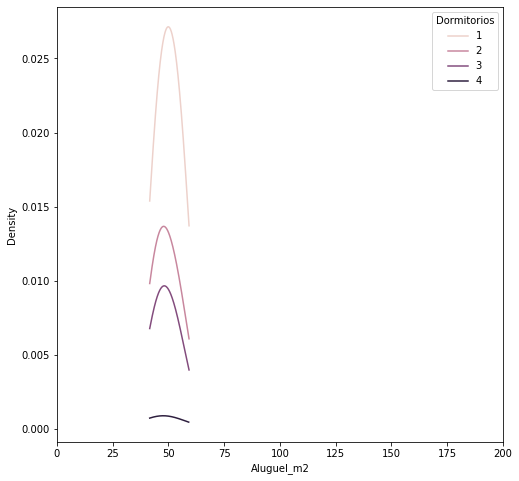

In [26]:
plt.figure(figsize=(8,8))
d_alm2zc = sns.kdeplot(data=df_a, x="Aluguel_m2", hue='Dormitorios', bw_adjust=5, cut=0)
d_alm2zc.set(xlim=(0,200))

[(0, 200)]

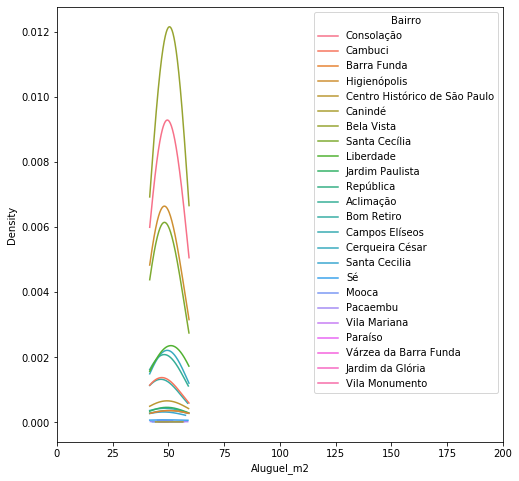

In [27]:
plt.figure(figsize=(8,8))
b_alm2 = sns.kdeplot(data=df_a, x="Aluguel_m2", hue='Bairro', bw_adjust=5, cut=0)
b_alm2.set(xlim=(0,200))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

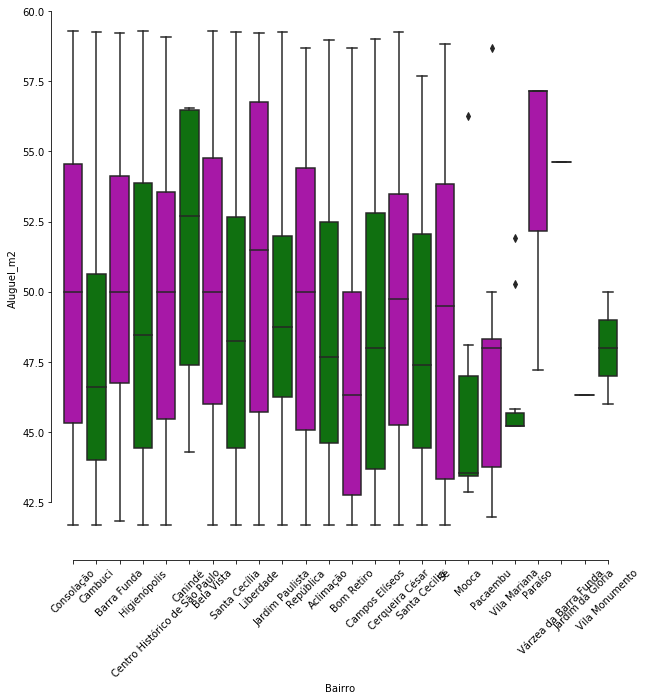

In [28]:
# Boxplot com os bairros e o algugeul por m2


plt.figure(figsize=(10,10))

sns.boxplot(x="Bairro", y="Aluguel_m2", palette=["m", "g"],
            data=df_a)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

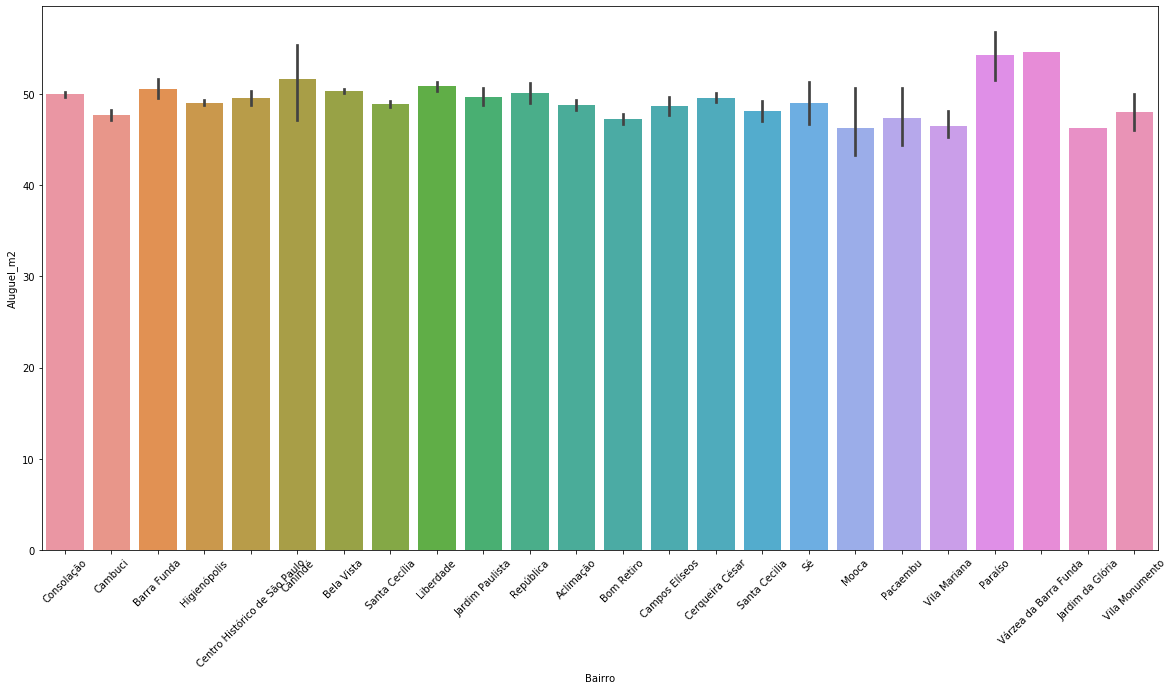

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x = df_a['Bairro'], y = df_a['Aluguel_m2'])
plt.xticks(rotation=45)

Centro histórico de São Paulo, Paraíso e Várzea da Barra Funda possuem as maiores médias de alguel por m2